In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
from predict_federal_reserve_interest_rates.util.date import get_period, parse_cpi_index_period
from predict_federal_reserve_interest_rates.util.viz import line_plot, histogram

In [2]:
# Import data
cpi_index = pd.read_csv("data/bls/cpi/bls_cpi_current.txt", delim_whitespace=True)

In [3]:
# Clean up values for various items in the CPI
cpi_index['value'] = cpi_index['value'].replace(['-'], 0.00)
cpi_index = cpi_index.astype({'value': 'float64'})

In [4]:
cpi_index['period'] = cpi_index.apply(lambda row: get_period(row), axis=1)

In [5]:
cpi_index = cpi_index.set_index('period')

In [6]:
federal_funds_rates = pd.read_csv("data/fed/federal_funds_effective_rate.csv")

In [7]:
federal_funds_rates = federal_funds_rates.astype({'federal_funds_effective_rate': 'float64',
                                                  'time_period': 'datetime64'}) \
                                                .rename(columns={'time_period': 'period'}) \
                                                .set_index('period')

In [8]:
federal_funds_rates = federal_funds_rates.resample('M').mean()

In [9]:
federal_funds_rates.index = federal_funds_rates.index.to_period('M')

In [10]:
cpi_index.head()

,series_id,year,value,footnote_codes
period,,,,
1995-01,APU0000701111,1995,0.238,NaN
1995-02,APU0000701111,1995,0.242,NaN
1995-03,APU0000701111,1995,0.242,NaN
1995-04,APU0000701111,1995,0.236,NaN
1995-05,APU0000701111,1995,0.244,NaN


In [11]:
federal_funds_rates.head()

,federal_funds_effective_rate
period,
1954-07,0.799355
1954-08,1.220645
1954-09,1.066667
1954-10,0.848710
1954-11,0.833667


In [12]:
cpi_index = cpi_index.groupby("period").mean()

/var/folders/3n/7kvkbqjd0l9grdj7kptkcfgr0000gn/T/ipykernel_29043/2709827089.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cpi_index = cpi_index.groupby("period").mean()


In [13]:
federal_funds_rates_array = federal_funds_rates.loc[federal_funds_rates.index >= '2000'].index.to_numpy()

In [14]:
cpi_index_array = cpi_index.loc[cpi_index.index >= '2000'].index.to_numpy()

In [15]:
federal_funds_rates_after_2000 = federal_funds_rates.loc[federal_funds_rates.index >= '2000']

In [16]:
cpi_index_after_2000 = cpi_index.loc[cpi_index.index >= '2000']

In [17]:
federal_funds_rates_array_after_2000 = federal_funds_rates_after_2000["federal_funds_effective_rate"].to_numpy()

In [18]:
cpi_index_array_after_2000 = cpi_index_after_2000["value"].to_numpy()

In [19]:
series = zip(cpi_index_array_after_2000, federal_funds_rates_array_after_2000)

In [32]:
x = np.array([])
y = np.array([])

for x_value, y_value in series:
    x = np.append(x, x_value)
    y = np.append(y, y_value)


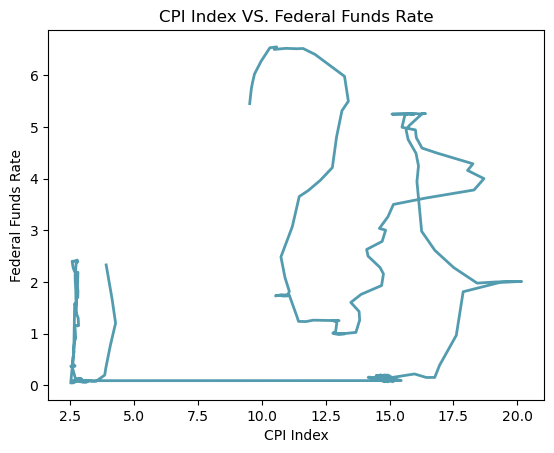

In [33]:
line_plot(x=x, 
          y=y, 
          x_label="CPI Index", 
          y_label="Federal Funds Rate",
          title="CPI Index VS. Federal Funds Rate")

<AxesSubplot: xlabel='CPI Index', ylabel='Federal Funds Rate'>

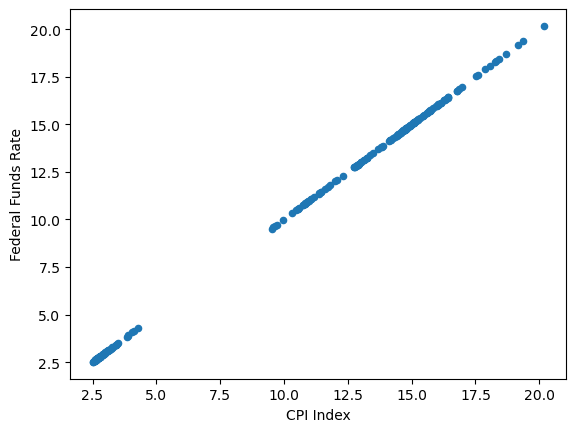

In [35]:
cpi_csv_ffr = pd.DataFrame({'CPI Index': x, 'Federal Funds Rate': x})
cpi_csv_ffr.plot('CPI Index', 'Federal Funds Rate', kind='scatter')

In [24]:
series = zip(federal_funds_rates_array_after_2000, cpi_index_array_after_2000)

In [21]:
x = np.array([])
y = np.array([])

for x_value, y_value in series:
    x = np.append(x, x_value)
    y = np.append(y, y_value)

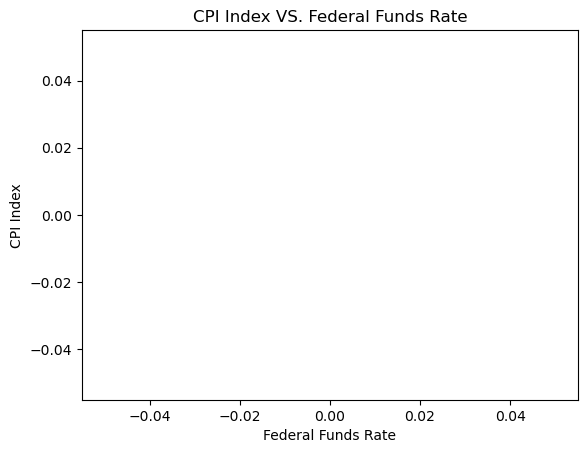

In [22]:
line_plot(x=x, 
          y=y, 
          x_label="Federal Funds Rate", 
          y_label="CPI Index",
          title="CPI Index VS. Federal Funds Rate")